In [2]:
#Part1
import pandas as pd
import numpy as np
#read 2 databases
df_life=pd.read_csv(r'D:\programming1\final\Health expectancy; since 1981.csv')
df_death=pd.read_csv(r'D:\programming1\final\deceased; leading causes of death (short list), age, gender .csv',thousands=',')
#display(df_life)
#display(df_death)



In [3]:
#Part2
#clean the data and find important columns of df_death
df_death=df_death[['Periods','All causes of death (number)','18.1 Confirmed COVID-19','Average population (number)']]
df_death=df_death.rename({'Periods':'year','All causes of death (number)':'Total_death','18.1 Confirmed COVID-19':'Covid_death','Average population (number)':'Avg_population'},axis=1)
#print(df_death.dtypes)
df_death=df_death.loc[df_death['year'].isin([2010,2018,2019,2020])]
#find the null values
print(df_death.isnull().sum())
df_death=df_death.fillna(0)
#add 7 rows to preparing the dataset to interpolate
df_death.loc[10] = [2011.0,np.nan,np.nan,np.nan]
df_death.loc[11] = [2012.0,np.nan,np.nan,np.nan]
df_death.loc[12] = [2013.0,np.nan,np.nan,np.nan]
df_death.loc[13] = [2014.0,np.nan,np.nan,np.nan]
df_death.loc[14] = [2015.0,np.nan,np.nan,np.nan]
df_death.loc[15] = [2016.0,np.nan,np.nan,np.nan]
df_death.loc[16] = [2017.0,np.nan,np.nan,np.nan]
display(df_death)
#change the type of column and set an index and sort to preparing for interpolating the data 
df_death=df_death.astype({'year':'int64'})
df_death=df_death.set_index('year')
df_death=df_death.sort_index()
display(df_death)
#interpolate the data of two rows of 2016 and 2017
df_death['Avg_population'].interpolate(method='linear',limit_direction='both', inplace=True, order=2)
df_death['Total_death'].interpolate(method='linear',limit_direction='both', inplace=True, order=2)
display(df_death)
#make a transpose of dataframe to be able to count the differences between years 
df_death=df_death.T
#delete the extra column after interpolating
df_death = df_death.drop([2010,2011,2012,2013,2014,2015], axis=1)
display(df_death)
#replace the none with ziro to be able to change the type to integer
df_death=df_death.replace(np.nan, 0)
df_death[[2016,2017,2018,2019,2020]]=df_death[[2016,2017,2018,2019,2020]].astype('int64')
#create the columns of percentages of changing between the years
df_death['2016-2017(%)']=((df_death[2017]/df_death[2016])-1)*100
df_death['2017-2018(%)']=((df_death[2018]/df_death[2017])-1)*100
df_death['2018-2019(%)']=((df_death[2019]/df_death[2018])-1)*100
df_death['2019-2020(%)']=((df_death[2020]/df_death[2019])-1)*100
display(df_death)
#replace the inf with none 
df_death=df_death.replace([np.inf, -np.inf], np.nan)
display(df_death)

year              0
Total_death       0
Covid_death       3
Avg_population    0
dtype: int64


,year,Total_death,Covid_death,Avg_population
6,2010.0,136058.0,0.0,16615300.0
7,2018.0,153363.0,0.0,17231103.0
8,2019.0,151885.0,0.0,17429187.0
9,2020.0,168678.0,17495.0,17525700.0
10,2011.0,NaN,NaN,NaN
11,2012.0,NaN,NaN,NaN
12,2013.0,NaN,NaN,NaN
13,2014.0,NaN,NaN,NaN
14,2015.0,NaN,NaN,NaN
15,2016.0,NaN,NaN,NaN


,Total_death,Covid_death,Avg_population
year,,,
2010,136058.0,0.0,16615300.0
2011,NaN,NaN,NaN
2012,NaN,NaN,NaN
2013,NaN,NaN,NaN
2014,NaN,NaN,NaN
2015,NaN,NaN,NaN
2016,NaN,NaN,NaN
2017,NaN,NaN,NaN
2018,153363.0,0.0,17231103.0


,Total_death,Covid_death,Avg_population
year,,,
2010,136058.000,0.0,1.661530e+07
2011,138221.125,NaN,1.669228e+07
2012,140384.250,NaN,1.676925e+07
2013,142547.375,NaN,1.684623e+07
2014,144710.500,NaN,1.692320e+07
2015,146873.625,NaN,1.700018e+07
2016,149036.750,NaN,1.707715e+07
2017,151199.875,NaN,1.715413e+07
2018,153363.000,0.0,1.723110e+07


year,2016,2017,2018,2019,2020
Total_death,149036.75,1.511999e+05,153363.0,151885.0,168678.0
Covid_death,NaN,NaN,0.0,0.0,17495.0
Avg_population,17077152.25,1.715413e+07,17231103.0,17429187.0,17525700.0


year,2016,2017,2018,2019,2020,2016-2017(%),2017-2018(%),2018-2019(%),2019-2020(%)
Total_death,149036,151199,153363,151885,168678,1.451327,1.431226,-0.963727,11.056391
Covid_death,0,0,0,0,17495,NaN,NaN,NaN,inf
Avg_population,17077152,17154127,17231103,17429187,17525700,0.450748,0.448732,1.149572,0.553744


year,2016,2017,2018,2019,2020,2016-2017(%),2017-2018(%),2018-2019(%),2019-2020(%)
Total_death,149036,151199,153363,151885,168678,1.451327,1.431226,-0.963727,11.056391
Covid_death,0,0,0,0,17495,NaN,NaN,NaN,NaN
Avg_population,17077152,17154127,17231103,17429187,17525700,0.450748,0.448732,1.149572,0.553744


In [4]:
#Part3
#clean the data and find important columns of df_life
df_life=df_life[['Sex','Age (at December 31)','Periods','Life expectancy (years)']]
df_life[['Age', 'A']] = df_life['Age (at December 31)'].str.split(' ', 1, expand=True)
df_life=df_life.rename({'Periods':'year','Life expectancy (years)':'life_expectency'},axis=1)
df_life=df_life[['year','Sex','Age','life_expectency']]
#find the null values
df_life.isnull().sum()
df_life=df_life.fillna(0)
#check the types of columns and change them
print(df_life.dtypes)
df_life=df_life.astype({'year':'int64','Age':'int64'})
print(df_life.dtypes)
#choose the rows that I need
df_life=df_life.loc[df_life['year'].isin([2016,2017,2018,2019,2020])]
display(df_life)
#reshape the dataframe to be able to concat to another dataframe
df_life=df_life.pivot_table(index=['Sex','Age'],columns='year',values='life_expectency')
display(df_life)
#create the columns of percentages of changing between the years
df_life['2016-2017(%)']=((df_life[2017]/df_life[2016])-1)*100
df_life['2017-2018(%)']=((df_life[2018]/df_life[2017])-1)*100
df_life['2018-2019(%)']=((df_life[2019]/df_life[2018])-1)*100
df_life['2019-2020(%)']=((df_life[2020]/df_life[2019])-1)*100
display(df_life)
#concat 2 dataframes
frames=[df_life,df_death]
df=pd.concat(frames)
df


year               float64
Sex                 object
Age                 object
life_expectency    float64
dtype: object
year                 int64
Sex                 object
Age                  int64
life_expectency    float64
dtype: object


,year,Sex,Age,life_expectency
4,2016,Male,0,79.88
5,2017,Male,0,80.06
6,2018,Male,0,80.16
7,2019,Male,0,80.46
8,2020,Male,0,79.67
13,2016,Male,30,51.05
14,2017,Male,30,51.31
15,2018,Male,30,51.36
16,2019,Male,30,51.66
17,2020,Male,30,50.86


year         2016   2017   2018   2019   2020
Sex    Age                                   
Female 0    83.13  83.32  83.33  83.56  83.08
       30   54.16  54.32  54.33  54.61  54.11
       65   21.43  21.49  21.46  21.67  21.15
Male   0    79.88  80.06  80.16  80.46  79.67
       30   51.05  51.31  51.36  51.66  50.86
       65   18.77  18.97  19.01  19.24  18.52

year         2016   2017   2018   2019   2020  2016-2017(%)  2017-2018(%)  \
Sex    Age                                                                  
Female 0    83.13  83.32  83.33  83.56  83.08      0.228558      0.012002   
       30   54.16  54.32  54.33  54.61  54.11      0.295421      0.018409   
       65   21.43  21.49  21.46  21.67  21.15      0.279981     -0.139600   
Male   0    79.88  80.06  80.16  80.46  79.67      0.225338      0.124906   
       30   51.05  51.31  51.36  51.66  50.86      0.509305      0.097447   
       65   18.77  18.97  19.01  19.24  18.52      1.065530      0.210859   

year        2018-2019(%)  2019-2020(%)  
Sex    Age                              
Female 0        0.276011     -0.574438  
       30       0.515369     -0.915583  
       65       0.978565     -2.399631  
Male   0        0.374251     -0.981854  
       30       0.584112     -1.548587  
       65       1.209890     -3.742204

year,2016,2017,2018,2019,2020,2016-2017(%),2017-2018(%),2018-2019(%),2019-2020(%)
"(Female, 0)",83.13,83.32,83.33,83.56,83.08,0.228558,0.012002,0.276011,-0.574438
"(Female, 30)",54.16,54.32,54.33,54.61,54.11,0.295421,0.018409,0.515369,-0.915583
"(Female, 65)",21.43,21.49,21.46,21.67,21.15,0.279981,-0.139600,0.978565,-2.399631
"(Male, 0)",79.88,80.06,80.16,80.46,79.67,0.225338,0.124906,0.374251,-0.981854
"(Male, 30)",51.05,51.31,51.36,51.66,50.86,0.509305,0.097447,0.584112,-1.548587
"(Male, 65)",18.77,18.97,19.01,19.24,18.52,1.065530,0.210859,1.209890,-3.742204
Total_death,149036.00,151199.00,153363.00,151885.00,168678.00,1.451327,1.431226,-0.963727,11.056391
Covid_death,0.00,0.00,0.00,0.00,17495.00,NaN,NaN,NaN,NaN
Avg_population,17077152.00,17154127.00,17231103.00,17429187.00,17525700.00,0.450748,0.448732,1.149572,0.553744


Estimation method: ML
mu =  51.60833333333333 , sigma =  27.569926671405323


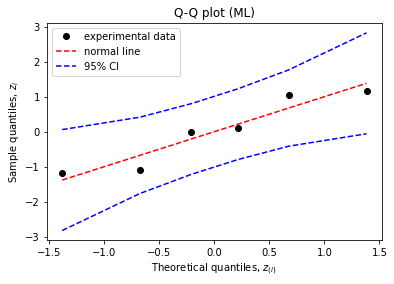

Estimation method: ML
mu =  51.866666666666674 , sigma =  27.5896818877396


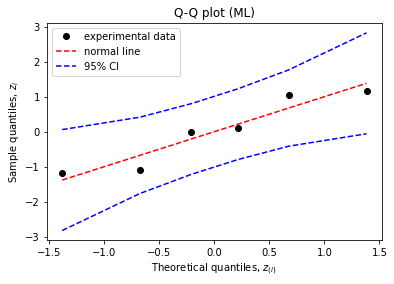

Estimation method: ML
mu =  51.23166666666666 , sigma =  27.59144027894642


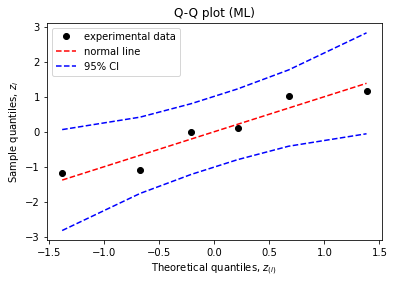

Estimation method: ML
mu =  5794822.0 , sigma =  9904406.715480892


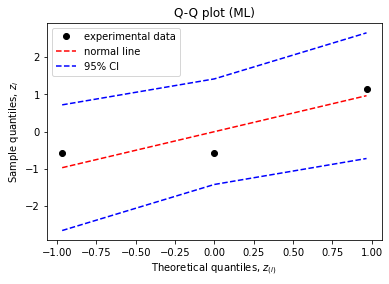

Estimation method: ML
mu =  5860357.333333333 , sigma =  10019188.198430367


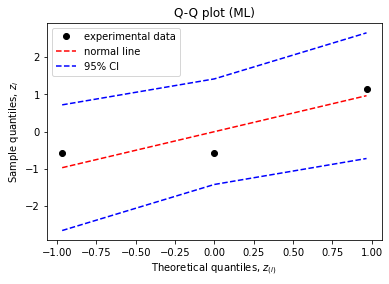

Estimation method: ML
mu =  5903957.666666667 , sigma =  10065007.95934441


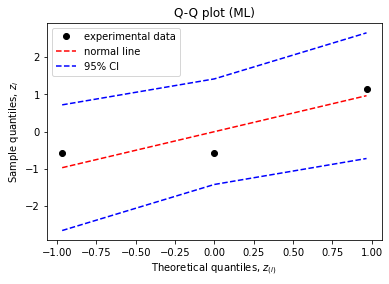

We can see that the life expectency follow the normal distribution so we can use the ttest for significant differences


In [38]:
#Part4
#make a function to plot the QQplot to check if the data follow the normal distribution or not
def Q_Q_Plot(y, est = 'robust', **kwargs):
    
    ################################################################################
    #
    # Arguments:
    #
    # y                  data array
    # est                Estimation method for normal parameters mu and sigma:
    #                    either 'robust' (default), or 'ML' (Maximum Likelihood),
    #                    or 'preset' (given values)
    # If est='preset' than the optional parameters mu, sigma must be provided
    #
    # Author:            M.E.F. Apol
    # Date:              2020-01-06
    #
    ################################################################################
    
    import numpy as np
    from scipy.stats import iqr # iqr is the Interquartile Range function
    import matplotlib.pyplot as plt
    
    # First, get the optional arguments mu and sigma:
    mu_0 = kwargs.get('mu', None)
    sigma_0 = kwargs.get('sigma', None)
    
    n = len(y)
    
    # Calculate order statistic:
    y_os = np.sort(y)
  
    # Estimates of mu and sigma:
    # ML estimates:
    mu_ML = np.mean(y)
    sigma2_ML = np.mean((y - mu_ML)**2)
    sigma_ML = np.sqrt(sigma2_ML) # biased estimate
    s2 = n/(n-1) * sigma2_ML
    s = np.sqrt(s2) # unbiased estimate
    # Robust estimates:
    mu_R = np.median(y)
    sigma_R = iqr(y)/1.349

    # Assign values of mu and sigma for z-transform:
    if est == 'ML':
        mu, sigma = mu_ML, s
    elif est == 'robust':
        mu, sigma = mu_R, sigma_R
    elif est == 'preset':
        mu, sigma = mu_0, sigma_0
    else:
        print('Wrong estimation method chosen!')
        
    print('Estimation method: ' + est)
    print('mu = ',mu,', sigma = ',sigma)
        
    # Perform z-transform: sample quantiles z.i
    z_i = (y_os - mu)/sigma

    # Calculate cumulative probabilities p.i:
    i = np.array(range(n)) + 1
    p_i = (i - 0.5)/n

    # Calculate theoretical quantiles z.(i):
    from scipy.stats import norm
    z_th = norm.ppf(p_i, 0, 1)

    # Calculate SE or theoretical quantiles:
    SE_z_th = (1/norm.pdf(z_th, 0, 1)) * np.sqrt((p_i * (1 - p_i)) / n)

    # Calculate 95% CI of diagonal line:
    CI_upper = z_th + 1.96 * SE_z_th
    CI_lower = z_th - 1.96 * SE_z_th

    # Make Q-Q plot:
    plt.plot(z_th, z_i, 'o', color='k', label='experimental data')
    plt.plot(z_th, z_th, '--', color='r', label='normal line')
    plt.plot(z_th, CI_upper, '--', color='b', label='95% CI')
    plt.plot(z_th, CI_lower, '--', color='b')
    plt.xlabel('Theoretical quantiles, $z_{(i)}$')
    plt.ylabel('Sample quantiles, $z_i$')
    plt.title('Q-Q plot (' + est + ')')
    plt.legend(loc='best')
    plt.show()
    return()
Q_Q_Plot(df_life[2018], est = 'ML')
Q_Q_Plot(df_life[2019], est = 'ML')
Q_Q_Plot(df_life[2020], est = 'ML')
Q_Q_Plot(df_death[2018], est='ML')
Q_Q_Plot(df_death[2019], est='ML')
Q_Q_Plot(df_death[2020], est='ML')
print('We can see that the life expectency follow the normal distribution so we can use the ttest for significant differences')

In [39]:
#Part5
#using the t_test to know if there is significant changes between 2018-2019 and 2019,2020 or not
from scipy.stats import ttest_ind
print('H0: There is no significant changes between life expectency and number of death in 2018 and 2019')
print('H1: There is significant changes between life expectency and number of death in 2018 and 2019')
print(ttest_ind(df_life[2018],df_life[2019],alternative='two-sided'))
print(ttest_ind(df_death[2018],df_death[2019],alternative='two-sided'))
print('Because p value > 0.05 : the hypothesis 1 is rejected, so there is no significant changes between life expectency and number of death in 2018 and 2019')
print('H0: There is no significant changes between life expectency and number of death in 2019 and 2020')
print('H1: There is significant changes between life expectency and number of death in 2019 and 2020')
print(ttest_ind(df_life[2019],df_life[2020],alternative='two-sided'))
print(ttest_ind(df_death[2019],df_death[2020],alternative='two-sided'))
print('Because p value > 0.05 : the hypothesis 1 is rejected,so there is no significant changes between life expectency and number of death in 2019 and 2020')


H0: There is no significant changes between life expectency and number of death in 2018 and 2019
H1: There is significant changes between life expectency and number of death in 2018 and 2019
Ttest_indResult(statistic=-0.016223698521917126, pvalue=0.9873750549856066)
Ttest_indResult(statistic=-0.008057053136212826, pvalue=0.9939572918702774)
Because p value > 0.05 : the hypothesis 1 is rejected, so there is no significant changes between life expectency and number of death in 2018 and 2019
H0: There is no significant changes between life expectency and number of death in 2019 and 2020
H1: There is significant changes between life expectency and number of death in 2019 and 2020
Ttest_indResult(statistic=0.03986335250397826, pvalue=0.9689867056713065)
Ttest_indResult(statistic=-0.005317528793093237, pvalue=0.996011876898606)
Because p value > 0.05 : the hypothesis 1 is rejected,so there is no significant changes between life expectency and number of death in 2019 and 2020


In [16]:
#Part6
#make a line graph to compare the years of life expectency of Female and Male in different age group
from bokeh.plotting import figure, show,output_file
from bokeh.models.widgets import Tabs, Panel

output_file("linegraph.html", title="linegraph")
def plot(y1,y2,label1,label2):
    TOOLS = "pan,wheel_zoom,box_zoom,reset,save,hover"
    years=['2016','2017','2018','2019','2020']
    p = figure(tools=TOOLS,width=600, height=600,tooltips="value, @y",x_axis_label='years', x_range=years,y_axis_label='life expectency(year)')

    p.line(years,y1,line_width=2,color="orange",alpha=0.8, legend_label=label1)
    p.circle(years,y1,fill_color="#fa8128", size=8)

    p.line(years,y2,line_width=2,color="darkblue",alpha=0.8, legend_label=label2)
    p.circle(years,y2,fill_color="#82eefd", size=8)
    p.legend.location = "center"
    p.title.text = 'Plot of life expectency between 2018 and 2020 '
    return(p)


p_0=plot(y1=[df_life[2016][0],df_life[2017][0],df_life[2018][0],df_life[2019][0],df_life[2020][0]],
    y2=[df_life[2016][3],df_life[2017][3],df_life[2018][3],df_life[2019][3],df_life[2020][3]],label1='0-30 Age of female',label2='0_30 Age of Male')
p_30=plot(y1=[df_life[2016][1],df_life[2017][1],df_life[2018][1],df_life[2019][1],df_life[2020][1]],
    y2=[df_life[2016][4],df_life[2017][4],df_life[2018][4],df_life[2019][4],df_life[2020][4]],label1='30-65 Age of female',label2='30-65 Age of Male')
p_65=plot(y1=[df_life[2016][2],df_life[2017][2],df_life[2018][2],df_life[2019][2],df_life[2020][2]],
    y2=[df_life[2016][5],df_life[2017][5],df_life[2018][5],df_life[2019][5],df_life[2020][5]],label1='65 and more of female',label2='65 and more of Male')


tab1 = Panel(child=p_0, title="0-30 Age")
tab2 = Panel(child=p_30, title="30-65 Age")
tab3 = Panel(child=p_65, title="65 and more")
tabs = Tabs(tabs=[tab1 ,tab2, tab3])

show(tabs)

In [15]:
#Part7
#create 2 stackbar graphs to compare of the percentage of changing between 2018-2020 of Female and Male of all age group
from bokeh.plotting import figure, show,output_file
from bokeh.layouts import gridplot
from bokeh.models import Span

output_file("stackbar.html", title="stackbar")
years = ["2018-2019", "2019-2020"]
Age=['0-30 age','30-65 age','65 and more']
color1 = ["#fc94af" , "#fa8128" , "#e3242B"]
color2 = ["#82eefd", "#0492c2", "#1338be"]
Female = {'years' : years,
        '0-30 age'   :[df_life['2018-2019(%)'][0],df_life['2019-2020(%)'][0]],
        '30-65 age'  :[df_life['2018-2019(%)'][1],df_life['2019-2020(%)'][1]],
        '65 and more':[df_life['2018-2019(%)'][2],df_life['2019-2020(%)'][2]]}
Male= {'years' : years,
        '0-30 age'   :[df_life['2018-2019(%)'][3],df_life['2019-2020(%)'][3]],
        '30-65 age'  :[df_life['2018-2019(%)'][4],df_life['2019-2020(%)'][4]],
        '65 and more':[df_life['2018-2019(%)'][5],df_life['2019-2020(%)'][5]]}
TOOLS = "pan,wheel_zoom,box_zoom,reset,save,hover"
p1 = figure(x_range=years, title="life expectency of female between 2018-2020",tools=TOOLS,x_axis_label='years',y_axis_label='Percentage of changes(%)',
           toolbar_location=None, tooltips="$name @years: @$name",)
p1.vbar_stack(Age, x='years', width=0.8, color=color1, source=Female,legend_label=Age)

p2 = figure(x_range=years, title="life expectency of male between 2018-2020",tools=TOOLS,x_axis_label='years',y_axis_label='Percentage of changes(%)',
           toolbar_location=None, tooltips="$name @years: @$name")
p2.vbar_stack(Age, x='years', width=0.8, color=color2, source=Male,legend_label=Age)


# vertical line
vline = Span(location=0, dimension='height', line_width=3)
# Horizontal line
hline = Span(location=0, dimension='width', line_color='black', line_width=3)
p1.renderers.extend([vline, hline])
p2.renderers.extend([vline, hline])


p1.legend.location = "bottom_left"
p2.legend.location = "bottom_left"
p1.legend.orientation = "vertical"
p2.legend.orientation = "vertical"
grid = gridplot(children = [[p1, p2]],width=500, height=600)
show(grid)

In [14]:
#Part8
#make bar graghs of life expectency of Female and Male of different age groups during 2016-2020
from bokeh.plotting import figure, show,output_file
from bokeh.transform import dodge
from bokeh.models import HoverTool
from bokeh.models import Row

output_file("bar.html", title="bargraph")
years=['2016','2017','2018','2019','2020']
Age = ['Age:0-30','Age:30-65','Age:65 and more']
sub_f = {'years':years,
       'Age:0-30':[df[2016][0],df[2017][0],df[2018][0],df[2019][0],df[2020][0]],
       'Age:30-65':[df[2016][1],df[2017][1],df[2018][1],df[2019][1],df[2020][1]],
       'Age:65 and more':[df[2016][2],df[2017][2],df[2018][2],df[2019][2],df[2020][2]]
       }

TOOLS = "pan,wheel_zoom,box_zoom,reset,save,hover"

p_f = figure(x_range=years,tools=TOOLS,width=600, height=600,tooltips="@sub_f")
p_f.vbar(x = dodge('years', -0.25 ,range = p_f.x_range),name='Age:0-30', top ='Age:0-30',
        width = 0.2,source = sub_f,color = "#ffd700",legend_label='Age:0-30')
p_f.vbar(x = dodge('years', 0.0 , range = p_f.x_range),name='Age:30-65',top = 'Age:30-65',
       width = 0.2,source = sub_f,color = "orange",  legend_label='Age:30-65')
p_f.vbar(x = dodge('years', 0.25 ,range = p_f.x_range),name='Age:65 and more',top = 'Age:65 and more',
       width = 0.2,source = sub_f,color = "red", legend_label='Age:65 and upper')
sub_m = {'years':years,
        'Age:0-30':[df[2016][3],df[2017][3],df[2018][3],df[2019][3],df[2020][3]],
       'Age:30-65':[df[2016][4],df[2017][4],df[2018][4],df[2019][4],df[2020][4]],
       'Age:65 and more':[df[2016][5],df[2017][5],df[2018][5],df[2019][5],df[2020][5]]
       }
p_m = figure(x_range=years,tools=TOOLS,width=600, height=600,tooltips="@sub_m")
p_m.vbar(x = dodge('years', -0.25 ,range = p_m.x_range),name='Age:0-30', top ='Age:0-30',
        width = 0.2,source = sub_m,color = "#82eefd",legend_label='Age:0-30')
p_m.vbar(x = dodge('years', 0.0 , range = p_m.x_range),name='Age:30-65',top = 'Age:30-65',
       width = 0.2,source = sub_m,color ="#0492c2",  legend_label='Age:30-65')
p_m.vbar(x = dodge('years', 0.25 ,range = p_m.x_range),name='Age:65 and more',top = 'Age:65 and more',
       width = 0.2,source = sub_m,color = "#1338be", legend_label='Age:65 and upper')


hover = HoverTool()
hover.tooltips = """
<div>
<div><strong>years:  </strong>@years</div>
<div><strong>value: </strong> @$name</div>
</div>"""
p_f.add_tools(hover)
p_m.add_tools(hover)


p_f.xaxis.axis_label = 'years'
p_m.xaxis.axis_label = 'years'
p_f.yaxis.axis_label = 'life expectency(years)'
p_m.yaxis.axis_label = 'life expectency(years)'
p_m.legend.location = "center"
p_f.legend.location = "center"
p_m.title='life expectency of Male between 2016-2020'
p_f.title='life expectency of Female between 2016-2020'
show(Row(p_f,p_m))

In [13]:
#Part9
#make 2 hbar graphs of changing the total death and average of population between 2016-2010
from bokeh.plotting import figure, show,output_file
from bokeh.transform import dodge
from bokeh.models import HoverTool
from bokeh.models import Row

output_file("hbar.html", title="Horizentalbar")
TOOLS = "pan,wheel_zoom,box_zoom,reset,save,hover"
years=['2016','2017','2018','2019','2020']
y1 =(df.T.iloc[0:5,6]/1000).tolist()
y2=(df.T.iloc[0:5,8]/1000).tolist()

p1 = figure(tools=TOOLS,width=500, height=500,tooltips="value ,@right",y_axis_label='years', y_range=years,x_axis_label='population(thousands)')
p1.hbar( y=years , right =y1,fill_color = "#00ffff",legend_label='Total death',left=0,height=0.5)
p1.legend.location = "bottom_left"
p1.title='Plot of Total death between 2016-2020'

p2 = figure(tools=TOOLS,width=500, height=500,tooltips="value , @right",y_axis_label='years', y_range=years,x_axis_label='population(thousands)')
p2.hbar( y=years , right =y2,fill_color = "#ffd700",legend_label='Avg of population',left=0,height=0.5,line_alpha=0.5)
p2.legend.location = "bottom_left"
p2.title='Plot of Average of population between 2016-2020'
show(Row(p1,p2))

year,2016-2017(%),2017-2018(%),2018-2019(%),2019-2020(%)
"(Female, 0)",0.228558,0.012002,0.276011,0.574438
"(Female, 30)",0.295421,0.018409,0.515369,0.915583
"(Female, 65)",0.279981,0.139600,0.978565,2.399631
Total_death,1.451327,1.431226,0.963727,11.056391


There is a strong relation between the incresing of Death and year of 2020, and also we can see that it affects more on Female of more than 65 years old rather than


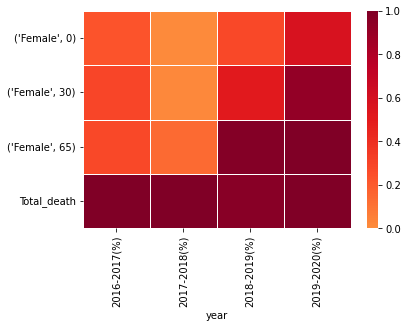

In [12]:
#Part10
#make a heatmap plot to show the relation between death and different age groups of female and male
import seaborn as sns
from bokeh.plotting import output_file

output_file("heatmap.html", title="heatmap")
df_heatmap=df.copy()
df_heatmap=df_heatmap.drop('Covid_death')
df_heatmap=df_heatmap.iloc[0:7,5:9]
df_heatmap=df_heatmap.T
df_heatmap_Female=df_heatmap.copy()
df_heatmap_Female = df_heatmap_Female.drop(df_heatmap_Female.columns[[3, 4, 5]],axis = 1)
corr_map_Female=df_heatmap_Female.T.abs()
display(corr_map_Female)
sns.heatmap(corr_map_Female,center=0,linewidths=.5,cmap="YlOrRd",vmin=0, vmax=1)
print('There is a strong relation between the incresing of Death and year of 2020, and also we can see that it affects more on Female of more than 65 years old rather than')

There is a strong relation between the incresing of Death and year of 2020, and also we can see that it affects more on Male of all group rather than Female.


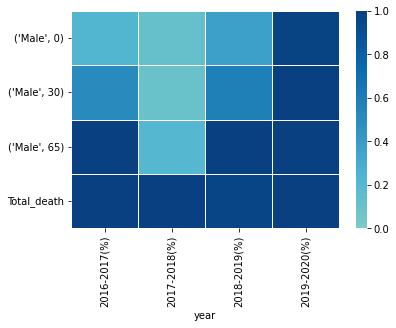

In [11]:
#Part11
import seaborn as sns
from bokeh.plotting import output_file

output_file("heatmap.html", title="heatmap")
df_heatmap_Male=df_heatmap.copy()
df_heatmap_Male=df_heatmap_Male.drop(df_heatmap_Male.columns[[0,1,2]],axis=1)
corr_map_Male=df_heatmap_Male.T.abs()
sns.heatmap(corr_map_Male,center=0,linewidths=.5,cmap="GnBu",vmin=0, vmax=1)
print('There is a strong relation between the incresing of Death and year of 2020, and also we can see that it affects more on Male of all group rather than Female.')

In [7]:
#Part12
#create the line graph to compare the changes of life expectency of different age groups of Male and Female and total death from 2016-2020
from bokeh.plotting import figure,show,output_file
from bokeh.models.widgets import Tabs, Panel

output_file("line.html", title="linegraph")
TOOLS = "pan,wheel_zoom,box_zoom,reset,save,hover"
years=['2016-2017(%)',	'2017-2018(%)',	'2018-2019(%)',	'2019-2020(%)']
p = figure(tools=TOOLS,width=600, height=600,tooltips="value, @y",x_axis_label='years',y_axis_label='percentage(%)', x_range=years)
def add_plot(p,y,color,label):
    
    p.line(years,y,line_width=2,color=color,alpha=0.8, legend_label=label)
    p.circle(years,y,fill_color=color, size=8)
    p.legend.location = "center"
    
    return(p)


g=add_plot(p,y=df.iloc[0,5:9].to_list(),color="#fa8128",label='Life Expectency Female 0-30')
g=add_plot(p,y=df.iloc[1,5:9].to_list(),color="#f87e7d",label='LE Female 30-65')
g=add_plot(p,y=df.iloc[2,5:9].to_list(),color="#ffed00",label='LE Female 65 and more')
g=add_plot(p,y=df.iloc[3,5:9].to_list(),color="#82eefd",label='LE Male 0-30')
g=add_plot(p,y=df.iloc[4,5:9].to_list(),color="#1061c3",label='LE Male 30_65')
g=add_plot(p,y=df.iloc[5,5:9].to_list(),color="#7ed085",label='LE Male 65 and more')
g=add_plot(p,y=df.iloc[6,5:9].to_list(),color="black",label='Total_death')
g=add_plot(p,y=df.iloc[8,5:9].to_list(),color="#757575",label='Average population')

g.title.text = 'Plot of life expectency between 2016 and 2020 '
g.legend.location = "top_left"
g.legend.title= 'Click on legend entries to hide the corresponding lines'
g.legend.click_policy="hide"

show(g)
